<a href="https://colab.research.google.com/github/lrav35/diffusion/blob/main/QuickDiffusionModel_TF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
from tqdm.auto import trange, tqdm
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers

In [55]:
IMG_SIZE = 32
BATCH_SIZE = 64
FIG_SIZE = (9, 9)
category = 5 # dogs
timesteps = 32
num_images = 36
time_bar = 1 - np.linspace(0, 1., timesteps + 1)

In [82]:
# load data and split into train and test
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()
X_train = X_train[y_train.squeeze() == category]
X_train = X_train / 127.5 - 1.0

In [80]:
# functions for viewing images
def show_examples(data, num_images=num_images):
  plt.figure(figsize=FIG_SIZE)
  grid_size = int(np.sqrt(num_images))
  for i in range(num_images):
    plt.subplot(grid_size, grid_size, i + 1)
    img = scale(data[i])
    plt.imshow(img)
    plt.axis('off')

def scale(img):
    img = img - img.min()
    img = img / img.max()
    return img

In [53]:
# util functions
def generate_ts(num):
  return np.random.randint(0, timesteps, size=num)

In [84]:
# forward noise
def forward_noise(img, ts):
  current_time = time_bar[ts]
  next_time = time_bar[ts + 1]

  noise = np.random.normal(size=img.shape)  # noise mask

  new_shape = tuple([-1] + [1 for _ in range(img.ndim - 1)])
  current_time = current_time.reshape(new_shape)
  next_time = next_time.reshape(new_shape)

  current_img = img * (1 - current_time) + noise * current_time
  next_img = img * (1 - next_time) + noise * next_time
  return current_img, next_img

In [85]:
ts = generate_ts(num_images)
current_imgs, next_imgs = forward_noise(X_train[:num_images], ts)

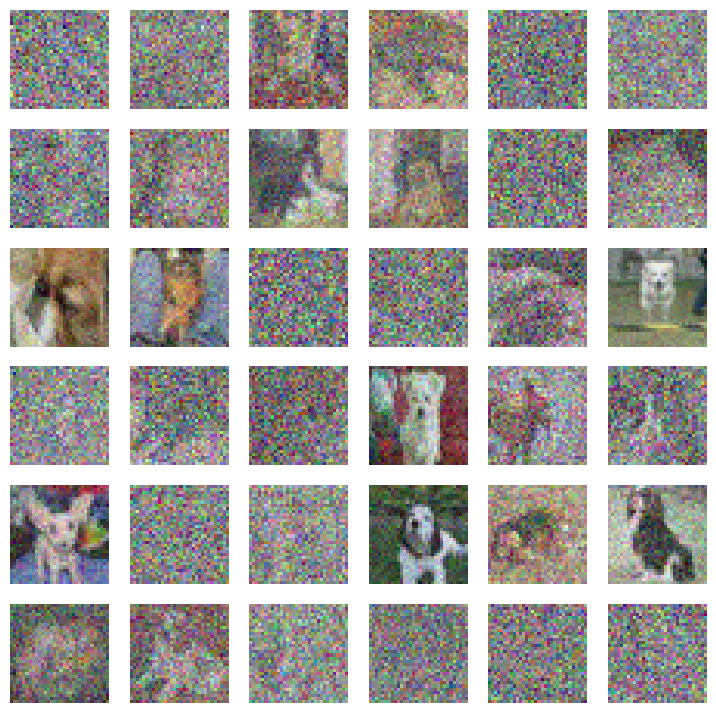

In [87]:
show_examples(current_imgs)

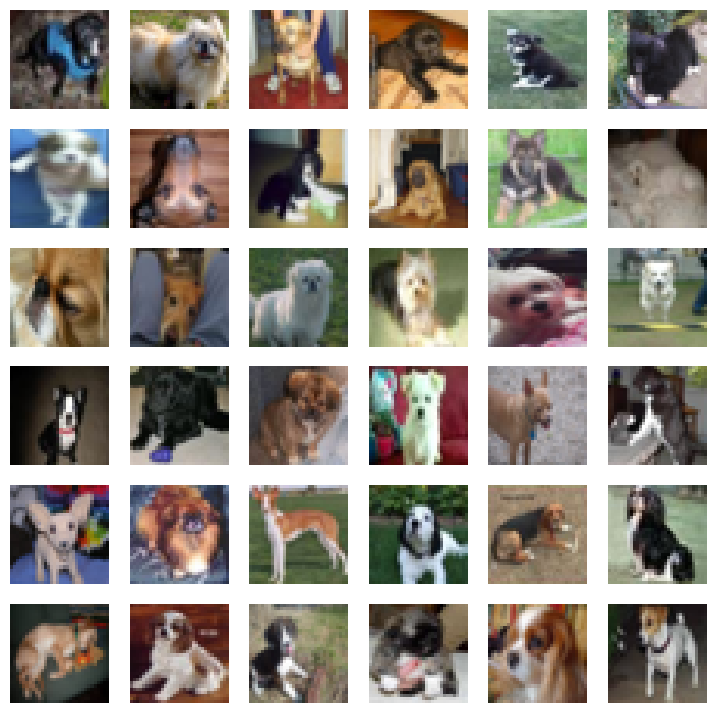

In [52]:
show_examples(X_train)